# In this notebook we visualize effects of inserting a single CTCF in multiple backgrounds

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
def load_data(h5_dirs, scd_stats, models=[1]):
    
    model_dfs = {} 
    for h5_num, h5_file in enumerate(glob.glob(h5_dirs)):
        
        for model in models:
            if f"model{model}_h" in h5_file:  
                df = akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None)
                if f"model{model}" in model_dfs.keys():
                    model_dfs[f"model{model}"] = pd.concat([model_dfs[f"model{model}"], df])
                else:
                    model_dfs[f"model{model}"] = df  
            
    # merged_df = pd.DataFrame()
    for df_num,df in enumerate(model_dfs.values()):
        if df_num ==0:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on=['CTCF_1_insert',"background_seqs"], how='inner', suffixes=("",f"_{df_num}"))
    
    if 'merged_df' not in locals():
        print("Error: merged_df is empty. Cannot perform further calculations.")
        exit(1)
    else:
        for stat in scd_stats:
            for model in models:
                merged_df[f"mean_{stat}_score_m{model}"] = (
                      merged_df[f"{stat}_h1_m{model}_t0"]
                    + merged_df[f"{stat}_h1_m{model}_t1"]
                    + merged_df[f"{stat}_h1_m{model}_t2"]
                    + merged_df[f"{stat}_h1_m{model}_t3"]
                    + merged_df[f"{stat}_h1_m{model}_t4"]
                    + merged_df[f"{stat}_h1_m{model}_t5"]
                ) / 6

            # Calculate mean score over models for current statistic
            mean_score = np.mean([
                merged_df[f"mean_{stat}_score_m{model}"] for model in models
            ], axis=0)

            # Add mean score column to DataFrame
            merged_df[f"mean_{stat}_score"] = mean_score

        return merged_df.reset_index(drop=True)


In [3]:
uniformly_selcted_model2_motifs_h5_dirs = (
 "/scratch1/kamulege/insert_experiments/12_uniformly_selcted_model2_motifs/*/*/*.h5"
)

uniformly_selcted_model2_motifs_df = load_data(uniformly_selcted_model2_motifs_h5_dirs, scd_stats=["SCD", "SSD"], models=[2,3,4,5,6,7])

uniformly_selcted_model2_motifs_df

,CTCF_1_genomic_SCD,CTCF_1_insert,SCD_h1_m7_t0,SCD_h1_m7_t1,SCD_h1_m7_t2,SCD_h1_m7_t3,SCD_h1_m7_t4,SCD_h1_m7_t5,SSD_h1_m7_t0,SSD_h1_m7_t1,...,mean_SCD_score_m6,mean_SCD_score_m7,mean_SCD_score,mean_SSD_score_m2,mean_SSD_score_m3,mean_SSD_score_m4,mean_SSD_score_m5,mean_SSD_score_m6,mean_SSD_score_m7,mean_SSD_score
0,2.691,"chr6,106800147,106800166,-,20,0,>",28.593750,31.703125,15.117188,14.210938,21.125000,15.992188,28.593750,31.703125,...,18.531250,21.125000,19.062500,11.375000,13.562500,27.562500,22.234375,18.531250,21.125000,19.062500
1,5.086,"chr10,49789340,49789359,-,20,0,>",0.112183,0.121277,0.102844,0.092529,0.099182,0.075012,0.112183,0.121277,...,0.094299,0.100525,0.093079,0.107239,0.032440,0.163452,0.060577,0.094299,0.100525,0.093079
2,7.836,"chr9,58534974,58534993,+,20,0,>",25.546875,29.250000,15.757812,14.843750,20.515625,15.562500,25.546875,29.250000,...,23.187500,20.234375,23.953125,14.226562,15.187500,36.156250,34.718750,23.187500,20.234375,23.953125
3,8.984,"chr9,58535604,58535623,+,20,0,>",0.122131,0.123657,0.067871,0.059845,0.063965,0.048523,0.122131,0.123657,...,0.142212,0.080994,0.164185,0.178345,0.090088,0.315186,0.178101,0.142212,0.080994,0.164185
4,10.875,"chr10,49789818,49789837,-,20,0,>",0.084900,0.086975,0.074524,0.066956,0.073669,0.057861,0.084900,0.086975,...,0.096191,0.074158,0.144165,0.197144,0.201782,0.120178,0.175659,0.096191,0.074158,0.144165
5,14.060,"chr11,29717382,29717401,-,20,0,>",0.049896,0.056976,0.047150,0.042358,0.046906,0.035645,0.049896,0.056976,...,0.029739,0.046478,0.064575,0.126343,0.054413,0.068848,0.061554,0.029739,0.046478,0.064575
6,15.620,"chr13,116713866,116713885,-,20,0,>",0.882324,0.951660,0.662109,0.581543,0.619141,0.477539,0.882324,0.951660,...,0.473389,0.695801,0.825684,0.424561,1.359375,0.399658,1.600586,0.473389,0.695801,0.825684
7,19.700,"chr13,116715010,116715029,-,20,0,>",24.828125,30.640625,23.468750,22.453125,25.593750,19.671875,24.828125,30.640625,...,32.093750,24.437500,33.031250,28.109375,26.203125,41.906250,45.468750,32.093750,24.437500,33.031250
8,29.940,"chr13,116712408,116712427,-,20,0,>",27.453125,33.718750,25.578125,24.546875,28.015625,21.609375,27.453125,33.718750,...,49.218750,26.828125,33.875000,16.359375,26.375000,46.875000,37.593750,49.218750,26.828125,33.875000
9,50.060,"chr1,5905663,5905682,-,20,0,>",0.448975,0.482178,0.190796,0.172241,0.240601,0.179443,0.448975,0.482178,...,0.089172,0.285645,0.164062,0.165039,0.109436,0.191772,0.143188,0.089172,0.285645,0.164062


In [4]:
# uniformly_selcted_model1_motifs_h5_dirs = (
#  "/scratch1/kamulege/insert_experiments/1000_uniformly_selcted_model1_motifs/*/*/*.h5"
# )

# uniformly_selcted_model1_motifs_df = load_data(uniformly_selcted_model1_motifs_h5_dirs, scd_stats=["SCD", "SSD"], models=[1])

# uniformly_selcted_model1_motifs_df

In [5]:
motifs_df = uniformly_selcted_model2_motifs_df

motifs_df.columns

Index(['CTCF_1_genomic_SCD', 'CTCF_1_insert', 'SCD_h1_m7_t0', 'SCD_h1_m7_t1',
       'SCD_h1_m7_t2', 'SCD_h1_m7_t3', 'SCD_h1_m7_t4', 'SCD_h1_m7_t5',
       'SSD_h1_m7_t0', 'SSD_h1_m7_t1', 'SSD_h1_m7_t2', 'SSD_h1_m7_t3',
       'SSD_h1_m7_t4', 'SSD_h1_m7_t5', 'background_seqs',
       'CTCF_1_genomic_SCD_1', 'SCD_h1_m6_t0', 'SCD_h1_m6_t1', 'SCD_h1_m6_t2',
       'SCD_h1_m6_t3', 'SCD_h1_m6_t4', 'SCD_h1_m6_t5', 'SSD_h1_m6_t0',
       'SSD_h1_m6_t1', 'SSD_h1_m6_t2', 'SSD_h1_m6_t3', 'SSD_h1_m6_t4',
       'SSD_h1_m6_t5', 'CTCF_1_genomic_SCD_2', 'SCD_h1_m5_t0', 'SCD_h1_m5_t1',
       'SCD_h1_m5_t2', 'SCD_h1_m5_t3', 'SCD_h1_m5_t4', 'SCD_h1_m5_t5',
       'SSD_h1_m5_t0', 'SSD_h1_m5_t1', 'SSD_h1_m5_t2', 'SSD_h1_m5_t3',
       'SSD_h1_m5_t4', 'SSD_h1_m5_t5', 'CTCF_1_genomic_SCD_3', 'SCD_h1_m4_t0',
       'SCD_h1_m4_t1', 'SCD_h1_m4_t2', 'SCD_h1_m4_t3', 'SCD_h1_m4_t4',
       'SCD_h1_m4_t5', 'SSD_h1_m4_t0', 'SSD_h1_m4_t1', 'SSD_h1_m4_t2',
       'SSD_h1_m4_t3', 'SSD_h1_m4_t4', 'SSD_h1_m4_t5', 'CTC

,CTCF_1_genomic_SCD,CTCF_1_insert,SCD_h1_m7_t0,SCD_h1_m7_t1,SCD_h1_m7_t2,SCD_h1_m7_t3,SCD_h1_m7_t4,SCD_h1_m7_t5,SSD_h1_m7_t0,SSD_h1_m7_t1,...,mean_SCD_score,mean_SSD_score_m2,mean_SSD_score_m3,mean_SSD_score_m4,mean_SSD_score_m5,mean_SSD_score_m6,mean_SSD_score_m7,mean_SSD_score,CTCF_1_genomic_SCD_norm,mean_SCD_score_norm
0,2.691,"chr6,106800147,106800166,-,20,0,>",28.593750,31.703125,15.117188,14.210938,21.125000,15.992188,28.593750,31.703125,...,19.062500,11.375000,13.562500,27.562500,22.234375,18.531250,21.125000,19.062500,0.043319,0.562500
1,5.086,"chr10,49789340,49789359,-,20,0,>",0.112183,0.121277,0.102844,0.092529,0.099182,0.075012,0.112183,0.121277,...,0.093079,0.107239,0.032440,0.163452,0.060577,0.094299,0.100525,0.093079,0.081874,0.002748
2,7.836,"chr9,58534974,58534993,+,20,0,>",25.546875,29.250000,15.757812,14.843750,20.515625,15.562500,25.546875,29.250000,...,23.953125,14.226562,15.187500,36.156250,34.718750,23.187500,20.234375,23.953125,0.126143,0.707031
3,8.984,"chr9,58535604,58535623,+,20,0,>",0.122131,0.123657,0.067871,0.059845,0.063965,0.048523,0.122131,0.123657,...,0.164185,0.178345,0.090088,0.315186,0.178101,0.142212,0.080994,0.164185,0.144623,0.004848
4,10.875,"chr10,49789818,49789837,-,20,0,>",0.084900,0.086975,0.074524,0.066956,0.073669,0.057861,0.084900,0.086975,...,0.144165,0.197144,0.201782,0.120178,0.175659,0.096191,0.074158,0.144165,0.175064,0.004257
5,14.060,"chr11,29717382,29717401,-,20,0,>",0.049896,0.056976,0.047150,0.042358,0.046906,0.035645,0.049896,0.056976,...,0.064575,0.126343,0.054413,0.068848,0.061554,0.029739,0.046478,0.064575,0.226336,0.001906
6,15.620,"chr13,116713866,116713885,-,20,0,>",0.882324,0.951660,0.662109,0.581543,0.619141,0.477539,0.882324,0.951660,...,0.825684,0.424561,1.359375,0.399658,1.600586,0.473389,0.695801,0.825684,0.251449,0.024368
7,19.700,"chr13,116715010,116715029,-,20,0,>",24.828125,30.640625,23.468750,22.453125,25.593750,19.671875,24.828125,30.640625,...,33.031250,28.109375,26.203125,41.906250,45.468750,32.093750,24.437500,33.031250,0.317128,0.975098
8,29.940,"chr13,116712408,116712427,-,20,0,>",27.453125,33.718750,25.578125,24.546875,28.015625,21.609375,27.453125,33.718750,...,33.875000,16.359375,26.375000,46.875000,37.593750,49.218750,26.828125,33.875000,0.481970,1.000000
9,50.060,"chr1,5905663,5905682,-,20,0,>",0.448975,0.482178,0.190796,0.172241,0.240601,0.179443,0.448975,0.482178,...,0.164062,0.165039,0.109436,0.191772,0.143188,0.089172,0.285645,0.164062,0.805860,0.004845


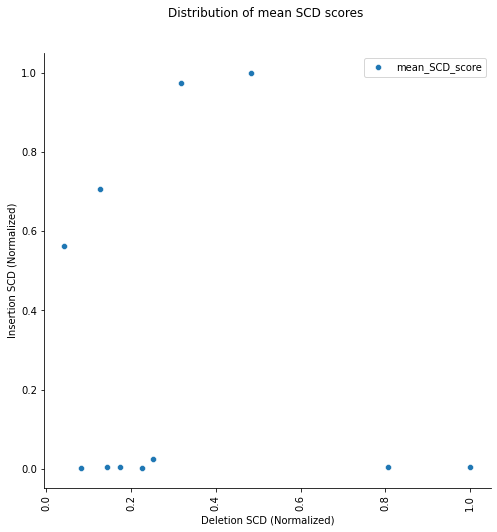

In [6]:
# normalize the data

max_ctcf = motifs_df['CTCF_1_genomic_SCD'].max()
max_mean_scd = motifs_df['mean_SCD_score'].max()
motifs_df['CTCF_1_genomic_SCD_norm'] = motifs_df['CTCF_1_genomic_SCD'] / max_ctcf
motifs_df['mean_SCD_score_norm'] = motifs_df['mean_SCD_score'] / max_mean_scd

# create the plot
fig, ax = plt.subplots(figsize=(8, 8)) #, dpi=200

# data = motifs_df[(motifs_df['mean_SCD_score_norm']>0.8) & (motifs_df['CTCF_1_genomic_SCD_norm']<0.5)]
data = motifs_df
display(data)

sns.scatterplot(data=data, ax=ax, x="CTCF_1_genomic_SCD_norm", y="mean_SCD_score_norm", label="mean_SCD_score")
# sns.scatterplot(data=data, ax=ax, x="CTCF_1_genomic_SCD", y="mean_SCD_score", label="mean_SCD_score")

sns.despine(top=True, right=True)
plt.xticks(rotation=90)
plt.title("Distribution of mean SCD scores \n \n ")

# Add bands for high and low correlation
# sns.regplot(data=motifs_df, ax=ax, x="CTCF_1_genomic_SCD_norm", y="mean_SCD_score_norm", scatter=False, color="red", label="High Correlation")
# sns.regplot(data=motifs_df, ax=ax, x="CTCF_1_genomic_SCD_norm", y="mean_SCD_score_norm", scatter=False, color="blue", label="Low Correlation")

plt.xlabel("Deletion SCD (Normalized)")
plt.ylabel("Insertion SCD (Normalized)")
plt.legend()
plt.show()



In [7]:
# [i for i in range(-1000,1050,50)]


In [8]:
# Calculate correlation between two columns
corr = df['column1'].corr(df['column2'])

# Check if correlation coefficient is close to zero
if abs(corr) < 0.1:
    # Select corresponding points for further analysis
    selected_points = df.loc[(df['column1'] == some_value) & (df['column2'] == some_other_value)]

NameError: name 'df' is not defined